[View in Colaboratory](https://colab.research.google.com/github/plaban1981/Keras-Classification-Model/blob/master/Handwrittendigit_Classification_Keras.ipynb)

In [0]:
import numpy as np
import pandas as pd
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


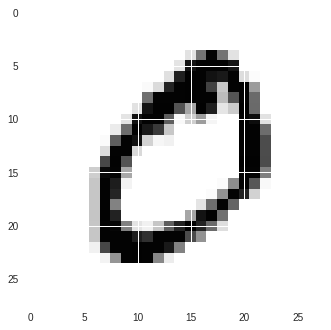

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])
plt.show()

In [11]:
print(y_train[1])

0


In [16]:
#reshape our data to feed as a single column to the network ie 28 x 28 = 784
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print("X_train dimensions :",X_train.shape)
print("X_test  dimensions :",X_test.shape)

X_train dimensions : (60000, 784)
X_test  dimensions : (10000, 784)


In [17]:
print(X_train[1])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

In [18]:
#normalize data as the data value ranges from o to 255, we want all the data to be normalized to have a range between 0 to 1
X_train = X_train / 255
X_test = X_test / 255
print(X_train[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [20]:
#convert the label data into categorical values using one hot encoding
Y_train = to_categorical(y_train,10)#10 since 10 different output labels
Y_test = to_categorical(y_test,10)
print(y_train[1])784
print(Y_train[1])
print(y_test[0])
print(Y_test[0])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
# Part 2 - Now let's make the ANN!
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=784, units=128, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=128, kernel_initializer="uniform"))

# Adding the output layer units=  10 since 10 different labels,softmax optimizer since multiclass classification
classifier.add(Dense(activation="softmax", units=10, kernel_initializer="uniform"))

# Compiling the ANN 
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [22]:
# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 128, nb_epoch = 4)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/4
60000/60000 [==============================] - 4s 63us/step - loss: 0.4341 - acc: 0.8800
Epoch 2/4
60000/60000 [==============================] - 3s 56us/step - loss: 0.1738 - acc: 0.9493
Epoch 3/4
60000/60000 [==============================] - 3s 58us/step - loss: 0.1197 - acc: 0.9646
Epoch 4/4
60000/60000 [==============================] - 3s 58us/step - loss: 0.0888 - acc: 0.9733


In [23]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [24]:
#evaluate the model
val_loss,val_score = classifier.evaluate(X_test,Y_test)

10000/10000 [==============================] - 0s 40us/step


In [25]:
print(val_loss)
print(val_score)

0.1001604861997068
0.9694


In [0]:
pred = classifier.predict(X_test)

In [0]:
x = X_test.reshape(-1,28,28)

In [30]:
x.shape

(10000, 28, 28)

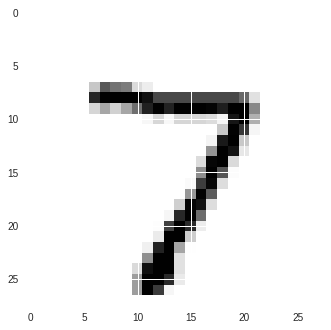

In [31]:
plt.imshow(x[0])
plt.show()

In [32]:
print(pred[0])#results the result in the form of one hot encoding

[1.0704544e-07 1.8461677e-07 2.2733626e-05 1.0114900e-05 1.5884647e-09
 2.2793767e-08 8.8575718e-15 9.9996388e-01 2.2813263e-07 2.6719003e-06]


In [0]:
p = np.argmax(pred,axis=1) #retrieving the position of the higest probability value using argmax numpy function

In [35]:
print(p[0])

7
